## Machine Learning - I
### Elements of Machine Learning
> * **Artificial Intelligence:** Infusing intelligence into a machines
> * **Machine Learning:** Algorithms that can learn from the experiance / large data.
> * **Deep Learning:** Algorithms inspired by human brain, that can learn featurees from large data set.

### Traditional Programming vs Machine Learning
> * A **Traditional Programming** is way of creating machine intelligense by manually coding the rules to achive the expected outcomping, i.e Creating Calculator program which requires set of rules to be defined to get the output. In Traditional Programming the User will provide the input to the code / algorithm which gives output by processing the  user input.

> * A **Machine Learning** is process of traing the machine to define it's own rules automatically from the given data sets, using those rules will be output will be predicted. In Machine Learning to achive the accurate outcome the Rules will be constructed with Train data since these data sets are collection of both Input and Output.

In [1]:
import pyforest
import matplotlib.pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,5]


### **Life Cycle of Machine Learning Algorithm:**
<img src="ML Algorithm - Life Cycle.png"> </img>
1. Perform Statistical Analysis on all the Features of given Data set with respect to Target Feature will all the possible Observations.
2. Identify the Missing Values in the Data Set, apply Encoding techniques to fill the Missing Values, Scaling of the Features, Outlier Identifications and Transfrom.
3. Create new Feature on each Observations if required, i.e post applying Encoding on the Missing values or during transforming categorical values using One-Hot, Label Encoding etc.
4. Feature Selection for Building model which will play vital role on given data set on the Target Variable.
5. Build Model with applicable algorithms along with Train Dataset Selected during the feature selection to achive the output (Target Value) prediction.
6. Validate the Model and Finetune it until to achive more accurate / optimized results. By Restart from the Feature Engineering and Feature Selection.
7. Test the Model to cheack the accuracy of the Model with the Test Features.
8. Deploy the model into cloud / Serve and serve to End User through Application / API Interface.

#### **Types Of Machine Learning**
- **Supervised Learning**: Training Machine Learning algorithm with labelled Data. Ex: Regression, Classification etc.
- **UnSupervised Learning**: Unsupervised Learning is meant to recognize patterns in Unlabelled data and categorizing them to labelled data set. Ex: Clustering, PCA etc.
- **Reinforcement Learning**: it working on principle of reward / aknowledgement from the end user, Machine gets rewarder for the better outcomes. Q-Learning, Bellman Equation etc.

In [2]:
sales = pd.read_csv("../data-sets/bigmartsales-cleaned.csv")
sales.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


#### 1. Data Summary

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [4]:
sales.Outlet_Establishment_Year = sales.Outlet_Establishment_Year.astype(object)

#### Data Summary Analysis

In [5]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,2181.288914,13.414514
std,5.776851,0.051598,62.258099,1706.499616,1.701840
min,0.000000,0.000000,31.300000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,13086.964800,24.000000


* In the Count Obervation the Item Weight is having missing values - its defect
* In the Mean value Observations the Mean of Item_Outlet_Sales are having slight diffrence is mean and 50% of its values distibutions - its defect as Right Sqewed
* Missing values on Item_Weight and Item_Visibility columns as they are having min as Zero, as they cannot be zero at any given scenario

In [6]:
sales.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,9,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,1463,2793,2793,5577


There are missing values in Outlet_Size and Location_Type features - defect

In [65]:
num_data = sales.select_dtypes(include=np.number)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

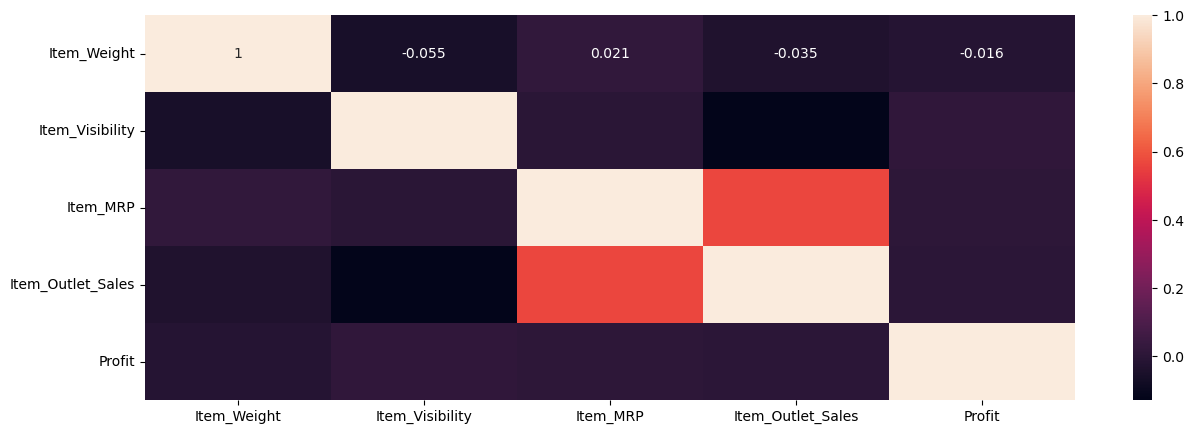

In [8]:
sns.heatmap(num_data.corr(), annot=True)

### 2. Data Preprocessing
#### Missing Valaues
**Limitations of Treating Missing Values in Data set**
1. If the entire data set is having only **<= 3%** of records are missing values, then drop the records from the Data Set.
2. If any Feature (Column, Attribute) is having more than 50% of Missing Values, then Drop the Feature from the Data set.
3. Apply Imputation Technique if the Missing Values in the Data set is upto **15%** (15% is not the Standard, but it's a best practice to make sure we not generating majority of the data set).
    *  Numerical Sample / Feature: can be filled with mean, median. median is applied if the feature has squewness on target feature
    * Categorical Feature : Can be filled with mode value.


In [9]:
sales.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

List out the Missing Value count and the percentage of data in the data set

In [10]:
total = sales.isnull().sum().sort_values(ascending=False)
percent = (sales.isnull().sum() / sales.shape[0])*100
percent = percent.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

<IPython.core.display.Javascript object>

,Total,Percent
Outlet_Size,2410,28.276428
Outlet_Location_Type,2050,24.052564
Item_Weight,749,8.787985
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


<IPython.core.display.Javascript object>

<Axes: >

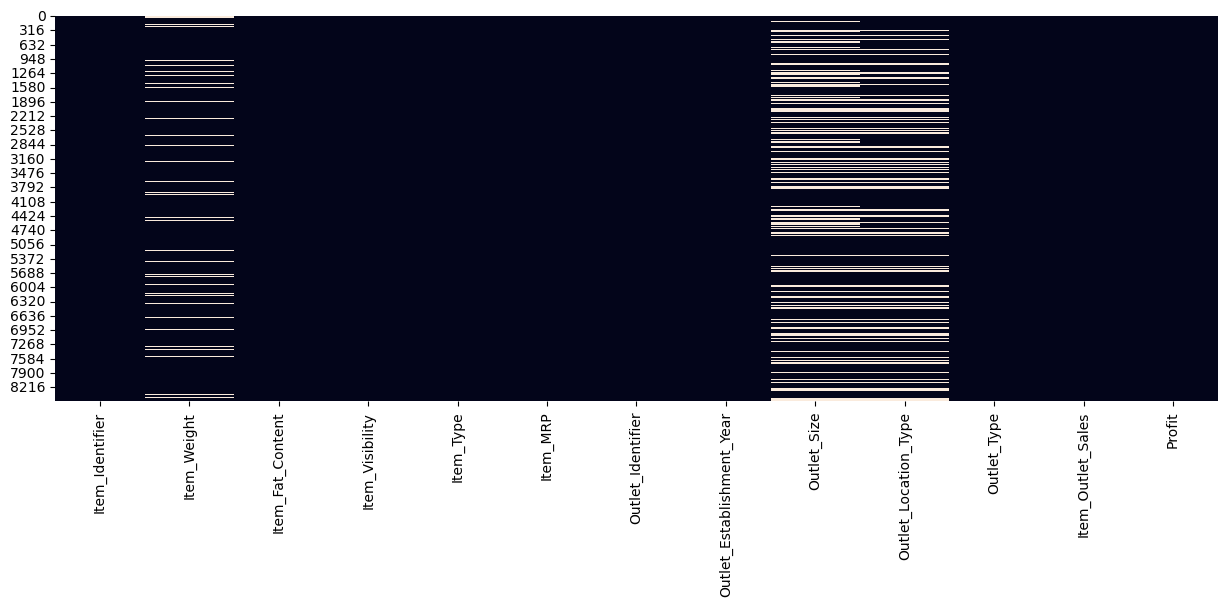

In [11]:
sns.heatmap(sales.isnull(), cbar=False)

In [12]:
sales_droped = sales.dropna()
sales.shape, sales_droped.shape

((8523, 13), (5364, 13))

Here 8523 - 5364 records are dropped, So 37.06 percent of data is lost. 

So here we cannot drop the table, We have to go with imputation


### 1. The Variable Outlet_Size

In [13]:
sales.Outlet_Size.value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [14]:
sales.Outlet_Size.replace(np.NaN, "Medium", inplace=True)

sales.Outlet_Size.isnull().sum()

<IPython.core.display.Javascript object>

0

### 2. Outlet_Location_Type

In [15]:
sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: count, dtype: int64

On this Feature the Missing Values are Non Standard Missing values, which are given by the client. where it cannot be identifiable by Machine intellegence

In [16]:
# Convert the Non Standard Values to NaN  then use then to raplace
sales.Outlet_Location_Type.replace(to_replace="?", value=np.NaN, inplace=True) 
sales.Outlet_Location_Type.replace(to_replace="  --", value=np.NaN, inplace=True)
sales.Outlet_Location_Type.replace(to_replace="  -", value=np.NaN, inplace=True)
sales.Outlet_Location_Type.replace(to_replace="na", value=np.NaN, inplace=True)
sales.Outlet_Location_Type.replace(to_replace="NAN", value=np.NaN, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
Name: count, dtype: int64

We have to check whether all the locations are performing the same sales are not. If it is same, we can replace nulls with any available locations

In [18]:
sales_impute = sales[['Item_Outlet_Sales', 'Outlet_Location_Type']].dropna()
sales_impute = sales_impute.groupby(sales_impute.Outlet_Location_Type).mean()

sales_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


In [19]:
index = np.where(sales.Outlet_Location_Type.isnull())[0]

for ind in index:
    if sales.loc[ind, 'Item_Outlet_Sales'] <= 2100:
        sales.loc[ind, 'Outlet_Location_Type'] = "Tier1"
    elif sales.loc[ind, 'Item_Outlet_Sales'] >= 2500:
        sales.loc[ind, 'Outlet_Location_Type'] = "Tier 2"
    else:
        sales.loc[ind, 'Outlet_Location_Type'] = "Tier 3"

<IPython.core.display.Javascript object>

In [20]:
sales.Outlet_Location_Type.isnull().sum()

0

In [21]:
sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier1     3947
Tier 2    3483
Tier 3    1093
Name: count, dtype: int64

### 3. The Variable Item_Weight

In [22]:
sales.Item_Weight.describe()


count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [23]:
# Defect witht this feature is replace the min values with NaN and then impute the values
sales.Item_Weight.replace(0, np.NaN, inplace=True)

<IPython.core.display.Javascript object>

In [24]:
sales.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [25]:
sales.Item_Weight.skew()

0.0824262091221237

In [26]:
sales.Item_Weight.fillna(sales.Item_Weight.median(), inplace=True)
sales.Item_Weight.describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

### 4. Item_Visibility

In [27]:
sales.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [28]:
sales.Item_Visibility.replace(0,sales.Item_Visibility.mean(), inplace=True)
sales.Item_Visibility.describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<IPython.core.display.Javascript object>

<Axes: >

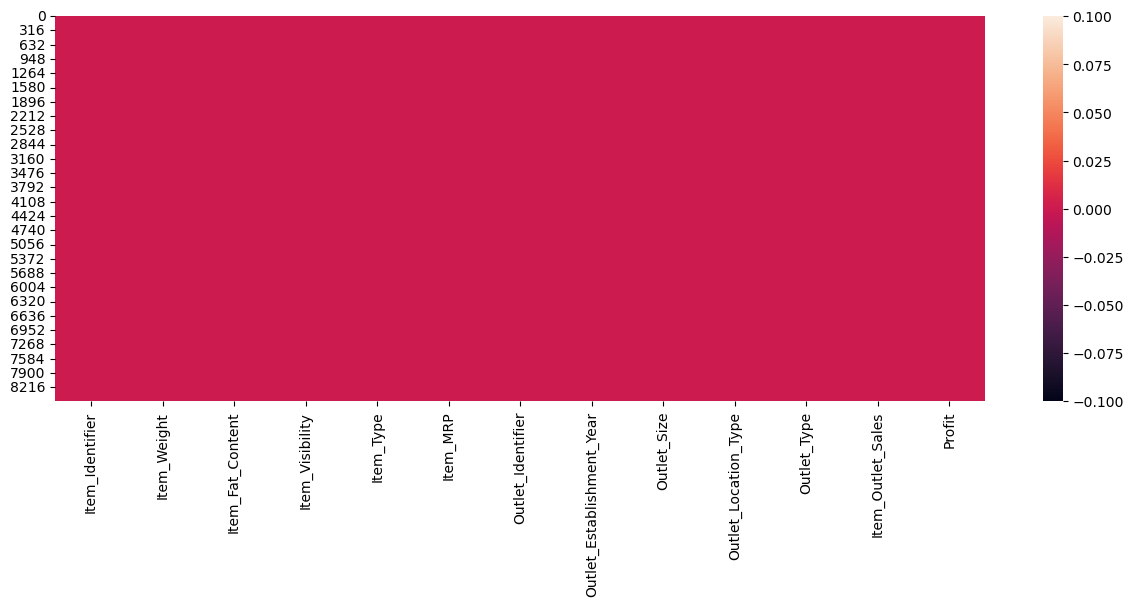

In [29]:
sns.heatmap(sales.isnull())

## Handling of Non Numerical Data

**Types of ways the Categorical values can be treated**
* N-1 Dummy Encoding
* One Hot Encoding
* Label Encoding
* Ordinal Encoding
* Frequency Encoding
* Target Encoding

In [30]:
sales.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,9,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier1,Supermarket Type1
freq,10,5517,1232,935,1463,5203,3947,5577


In [31]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

#### One Hot Encoding

In [32]:
test = pd.get_dummies(sales, columns=["Item_Type"], dtype=int)
test.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.066132,182.1,OUT010,1998,Medium,Tier1,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.066132,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


In [33]:
test1 = pd.get_dummies(sales, columns=['Item_Type'], drop_first=True, dtype=int)
test1.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.066132,182.1,OUT010,1998,Medium,Tier1,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.066132,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   object 
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   object 
 7   Outlet_Size                      8523 non-null   object 
 8   Outlet_Location_Type             8523 non-null   object 
 9   Outlet_Type                      8523 non-null   object 
 10  Item_Outlet_Sales                8523 non-null   float64
 11  Profit                           8523 non-null   float64
 12  Item_Type_Baking Goo

In [35]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   object 
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   object 
 7   Outlet_Size                      8523 non-null   object 
 8   Outlet_Location_Type             8523 non-null   object 
 9   Outlet_Type                      8523 non-null   object 
 10  Item_Outlet_Sales                8523 non-null   float64
 11  Profit                           8523 non-null   float64
 12  Item_Type_Breads    

In [36]:
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder()

sales_encode = pd.DataFrame(encode.fit_transform(sales[["Outlet_Type"]]).toarray(), columns=["Grocery Store", 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3' ]
                            )
sales_encode = pd.concat([sales, sales_encode], axis=1)

sales_encode.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0.0,1.0,0.0,0.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0.0,0.0,1.0,0.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0.0,1.0,0.0,0.0
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1.0,0.0,0.0,0.0
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0.0,1.0,0.0,0.0


In [37]:
sales_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
 13  Grocery Store              8523 non-null   float

### Label Encoding

In [38]:
sales.Outlet_Size.value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sales['Label_Encoded_Outlet_Size'] = label_encoder.fit_transform(sales.Outlet_Size)

sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0


<a id="ord"> </a>
## 3 Ordinal Encoding (Using Sklearn)

Ordinal encoding can be used to encode the ordinal variable with the values from 0 to (n-1) for 'n' distinct categories. We can pass the order to the encoder to assign the categories in the variable. We encode the variable `Outlet_Size` using OrdinalEncoder.

In [41]:
# import the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# instantiate the encoder with the list of categories in the required order
orderencoding = OrdinalEncoder(categories = [["Small", "Medium", "High", "nan"]])

# add a column of ordered labels
# reshape(-1, 1): to rearrange the data
sales['Order_Outlet_Size'] = orderencoding.fit_transform(sales['Outlet_Size'].values.reshape(-1,1))

# display the data
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size,Order_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1,1.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1,1.0
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1,1.0
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0,2.0


<a id="freq"> </a>
## 3.5 Frequency Encoding (Using Sklearn)

Frequency encoding is used to encode the values with the frequency of each category of the categorical variable. This method is not useful if the categories have the same frequency; as the encoded column will contain the same value for all the observations. 

#### Encode the variable `Item_Type` with the frequency of each category.

In [42]:
# frequency encoding on 'Item_Type'
# size of each category
encoding = sales.groupby('Item_Type').size()

# get frequency of each category
encoding = encoding/len(sales)

# encode the column
# map(): apply encoding to each item in the variable
# and multiply by 100
sales['Freq_Encoded_Item_Type'] = sales.Item_Type.map(encoding)*100

# print first five rows of the data
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size,Order_Outlet_Size,Freq_Encoded_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1,1.0,8.001877
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1,1.0,5.221166
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1,1.0,4.986507
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1,1.0,14.455004
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0,2.0,10.676992


In [43]:
# create a dataframe for 'Item_Type' and its corresponding frequency encoding
# .unique(): to get the unique values
pd.DataFrame(sales['Item_Type'].unique(), sales['Freq_Encoded_Item_Type'].unique(), columns= ['Item_Type'])

<IPython.core.display.Javascript object>

,Item_Type
8.001877,Dairy
5.221166,Soft Drinks
4.986507,Meat
14.455004,Fruits and Vegetables
10.676992,Household
7.602957,Baking Goods
14.079549,Snack Foods
10.043412,Frozen Foods
1.290625,Breakfast
6.101138,Health and Hygiene


**Interpretation:** From the above result,for all categories in the variable we get the percentage of occurrence for that specific category.
The 'Fruits and Vegetables', 'Household', 'Snack Foods', and 'Frozen Foods' have the highest proportion among all the products.

<div id="target" > </div>

## Target Encoding

In [48]:
smoker = pd.DataFrame({"smoker": ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no'], "target": [1,0,0,1,0,1,1,0,1,0]})

smoker

<IPython.core.display.Javascript object>

,smoker,target
0,yes,1
1,yes,0
2,no,0
3,no,1
4,yes,0
5,yes,1
6,no,1
7,no,0
8,yes,1
9,no,0


In [52]:

smoker['make_target_encode'] = smoker.groupby('smoker')['target'].transform('mean')

smoker

,smoker,target,make_target_encode
0,yes,1,0.6
1,yes,0,0.6
2,no,0,0.4
3,no,1,0.4
4,yes,0,0.6
5,yes,1,0.6
6,no,1,0.4
7,no,0,0.4
8,yes,1,0.6
9,no,0,0.4


## Scaling

<IPython.core.display.Javascript object>

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

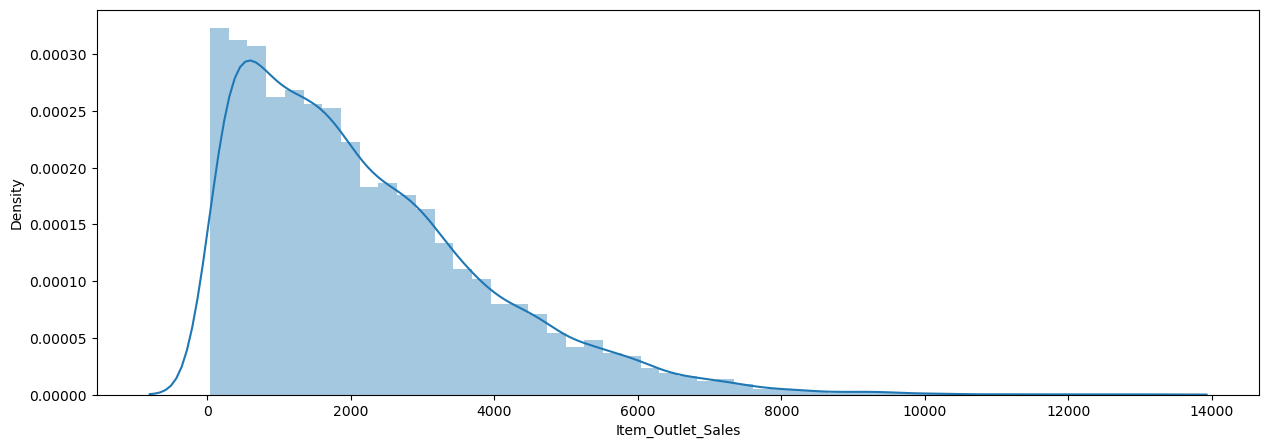

In [57]:
sns.distplot(sales.Item_Outlet_Sales)

In [60]:
# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",sales['Item_Outlet_Sales'].min(),"\n",
      "The maximum value of the sales:", sales['Item_Outlet_Sales'].max())
print(sales.Item_Outlet_Sales.skew())

 The minimum value of the sales: 33.29 
 The maximum value of the sales: 13086.9648
1.1775306028542796


In [59]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
sales['Scaled_Item_Outlet_Sales'] = standard_scale.fit_transform(sales[['Item_Outlet_Sales']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",sales['Scaled_Item_Outlet_Sales'].min(),"\n",
      "The maximum value of the sales:", sales['Scaled_Item_Outlet_Sales'].max())
print(sales.Scaled_Item_Outlet_Sales.skew())

 The minimum value of the sales: -1.2587901671720854 
 The maximum value of the sales: 6.391044932769205
1.1775306028542794


In [62]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
standard_scale = MinMaxScaler()

# fit the StandardScaler
sales['MinMax_Item_Outlet_Sales'] = standard_scale.fit_transform(sales[['Item_Outlet_Sales']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",sales['MinMax_Item_Outlet_Sales'].min(),"\n",
      "The maximum value of the sales:", sales['MinMax_Item_Outlet_Sales'].max())
print(sales.MinMax_Item_Outlet_Sales.skew())

 The minimum value of the sales: 0.0 
 The maximum value of the sales: 1.0
1.1775306028542798


## Treating Outliers in Sample

#### Ways of Treating Outliers
1. Drop
2. Cap
3. transform

In [66]:
num_data = sales.select_dtypes(include=np.number)
num_data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size,Order_Outlet_Size,Freq_Encoded_Item_Type,Scaled_Item_Outlet_Sales,MinMax_Item_Outlet_Sales
0,9.300,0.016047,249.8,3735.1380,11.5,1,1.0,8.001877,0.910601,0.283587
1,5.920,0.019278,48.3,443.4228,14.3,1,1.0,5.221166,-1.018440,0.031419
2,17.500,0.016760,141.6,2097.2700,14.5,1,1.0,4.986507,-0.049238,0.158115
3,19.200,0.066132,182.1,732.3800,13.6,1,1.0,14.455004,-0.849103,0.053555
4,8.930,0.066132,53.9,994.7052,14.1,0,2.0,10.676992,-0.695373,0.073651
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.1,0,2.0,14.079549,0.349915,0.210293
8519,8.380,0.046982,108.2,549.2850,14.2,1,1.0,7.602957,-0.956402,0.039529
8520,10.600,0.035186,85.1,1193.1136,9.5,2,0.0,6.101138,-0.579100,0.088850
8521,7.210,0.145221,103.1,1845.5976,14.2,1,1.0,14.079549,-0.196725,0.138835


In [67]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Profit                     8523 non-null   float64
 5   Label_Encoded_Outlet_Size  8523 non-null   int32  
 6   Order_Outlet_Size          8523 non-null   float64
 7   Freq_Encoded_Item_Type     8523 non-null   float64
 8   Scaled_Item_Outlet_Sales   8523 non-null   float64
 9   MinMax_Item_Outlet_Sales   8523 non-null   float64
dtypes: float64(9), int32(1)
memory usage: 632.7 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

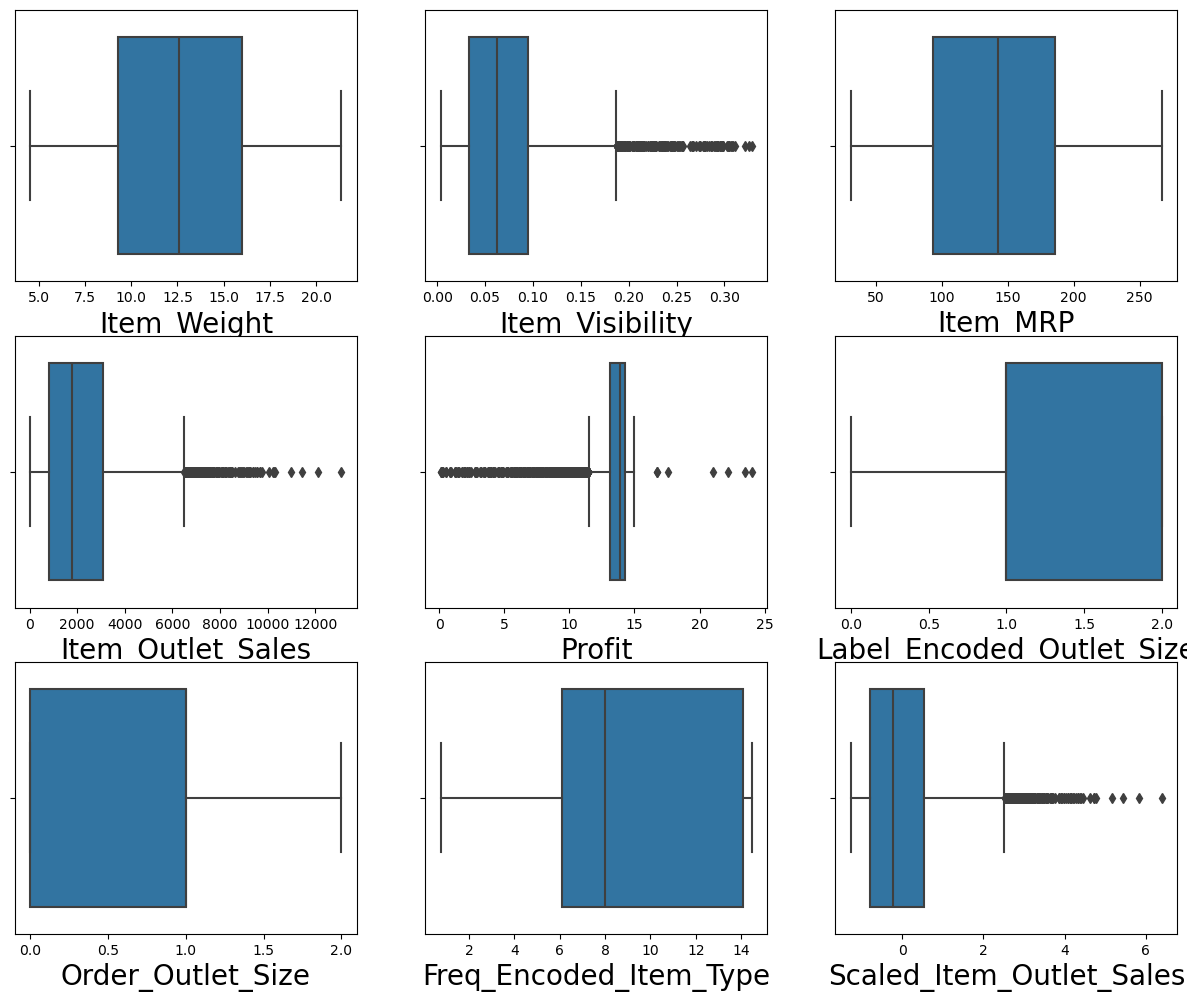

In [69]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))

for variable, subplot in zip(num_data.columns, ax.flatten()):
    z = sns.boxplot(x = num_data[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                   # set the x-axis label

In [70]:
q1 = num_data.quantile(0.25)
q2 = num_data.quantile(0.50)
q3 = num_data.quantile(0.75)
IQR = q3 - q1
lb = q1 - 1.5 * IQR
ub = q1 + 1.5 * IQR

In [72]:
num_data1 = num_data[~(((num_data < lb) | (num_data > ub)).any(axis=1))]
num_data1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size,Order_Outlet_Size,Freq_Encoded_Item_Type,Scaled_Item_Outlet_Sales,MinMax_Item_Outlet_Sales
1,5.92,0.019278,48.3,443.4228,14.3,1,1.0,5.221166,-1.018440,0.031419
2,17.50,0.016760,141.6,2097.2700,14.5,1,1.0,4.986507,-0.049238,0.158115
3,19.20,0.066132,182.1,732.3800,13.6,1,1.0,14.455004,-0.849103,0.053555
8,16.20,0.016687,97.0,1076.5986,13.0,1,1.0,10.043412,-0.647381,0.079925
10,11.80,0.066132,45.5,1516.0266,14.3,1,1.0,14.455004,-0.389863,0.113588
...,...,...,...,...,...,...,...,...,...,...
8513,12.00,0.020407,99.9,595.2252,13.5,2,0.0,4.986507,-0.929480,0.043048
8514,15.00,0.054489,57.6,468.7232,14.0,1,1.0,7.614690,-1.003614,0.033357
8516,18.60,0.118661,58.8,858.8820,14.6,1,1.0,1.982870,-0.774969,0.063246
8519,8.38,0.046982,108.2,549.2850,14.2,1,1.0,7.602957,-0.956402,0.039529


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

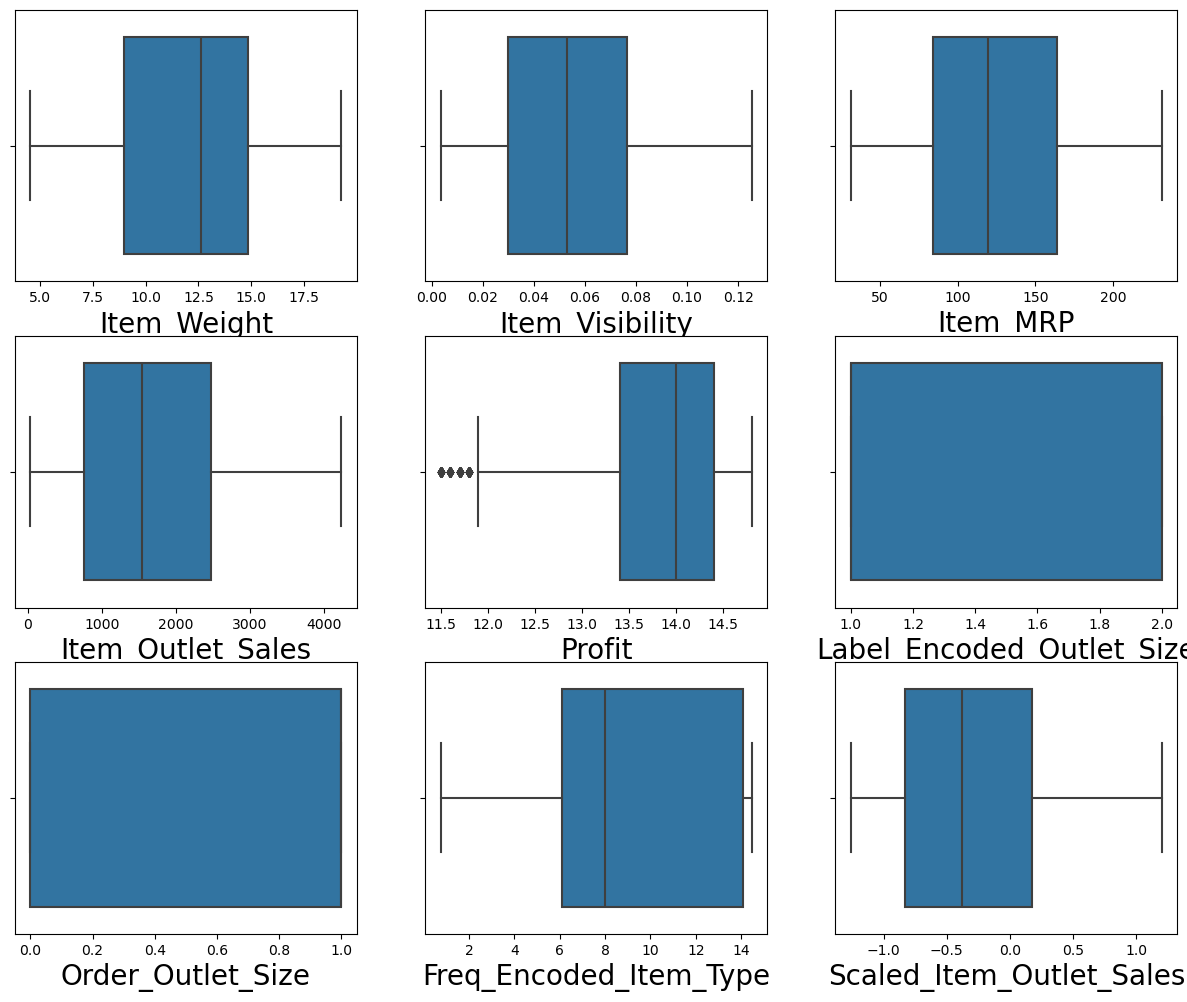

In [73]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))

for variable, subplot in zip(num_data1.columns, ax.flatten()):
    z = sns.boxplot(x = num_data1[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  

In [78]:
import scipy

drop2 = sales[['Item_Visibility', 'Item_Outlet_Sales', 'Profit']]

zscore_df = scipy.stats.zscore(drop2)

df_zscore = drop2[~((zscore_df > 3) | (zscore_df < -3))]

df_zscore

,Item_Visibility,Item_Outlet_Sales,Profit
0,0.016047,3735.1380,11.5
1,0.019278,443.4228,14.3
2,0.016760,2097.2700,14.5
3,0.066132,732.3800,13.6
4,0.066132,994.7052,14.1
...,...,...,...
8518,0.056783,2778.3834,14.1
8519,0.046982,549.2850,14.2
8520,0.035186,1193.1136,9.5
8521,0.145221,1845.5976,14.2


### Droping

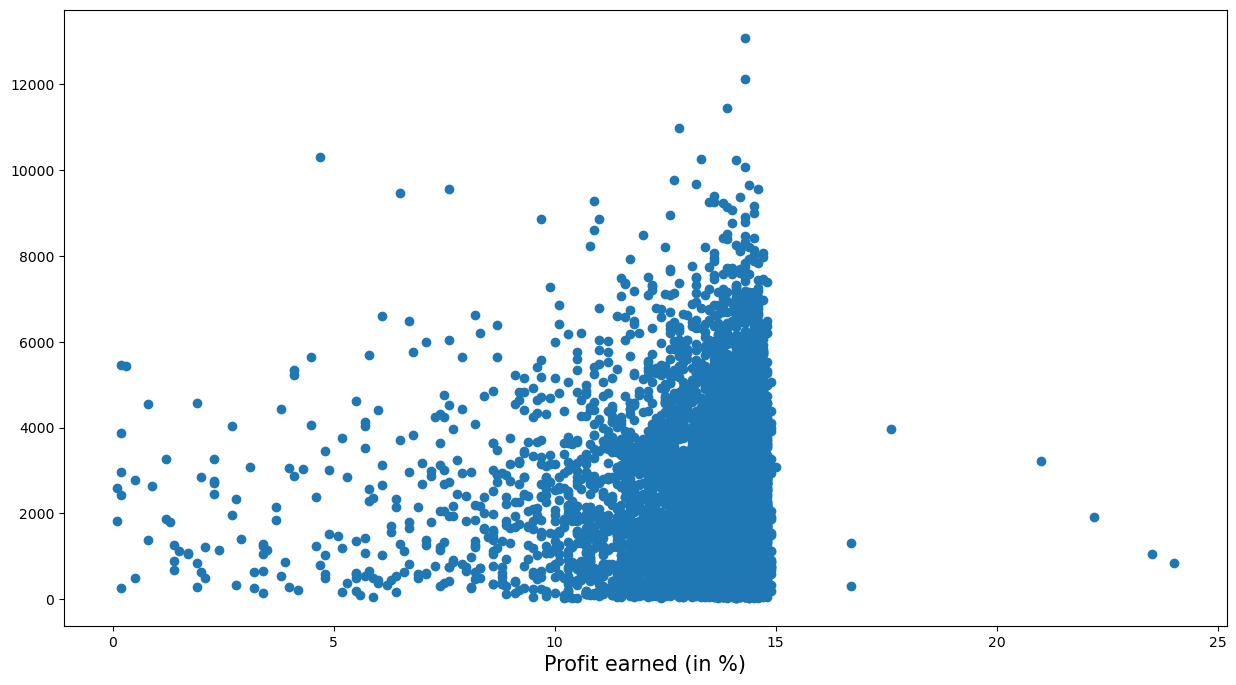

In [77]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(sales.Profit, sales.Item_Outlet_Sales)
ax.set_xlabel("Profit earned (in %)", fontsize = 15)

ax.set_ylabel('')
plt.show()

In [79]:
sales_scatterplt = sales[sales.Profit < 15]
num_data = sales[['Item_Visibility', 'Item_Outlet_Sales', 'Profit']]

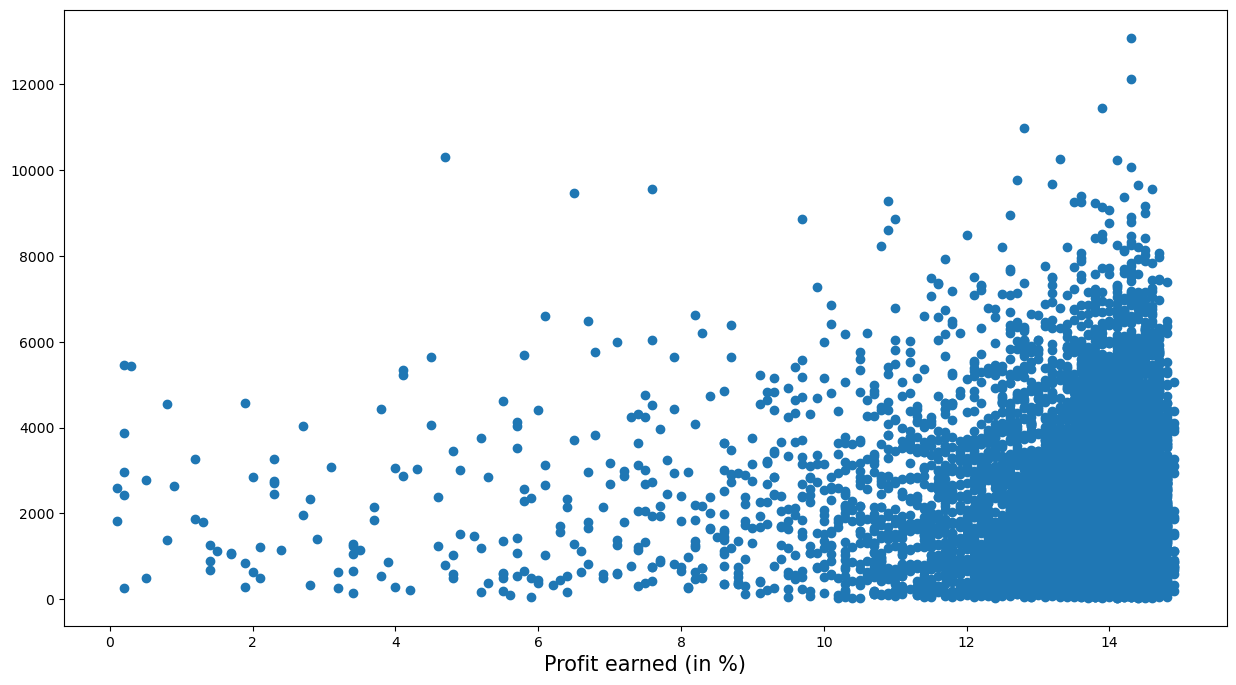

In [80]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(sales_scatterplt.Profit, sales_scatterplt.Item_Outlet_Sales)
ax.set_xlabel("Profit earned (in %)", fontsize = 15)

ax.set_ylabel('')
plt.show()

### Capping

In [81]:
num_data.skew()

Item_Visibility      1.286877
Item_Outlet_Sales    1.177531
Profit              -3.379808
dtype: float64

In [82]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    q_10 = num_data[i].quantile(0.10)
    q_90 = num_data[i].quantile(0.9)

    num_data[i] = np.where(num_data[i] < lb, q_10, num_data[i])
    num_data[i] = np.where(num_data[i] > ub, q_90, num_data[i])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
num_data.skew()

Item_Visibility      0.724283
Item_Outlet_Sales    0.710554
Profit              -0.884417
dtype: float64

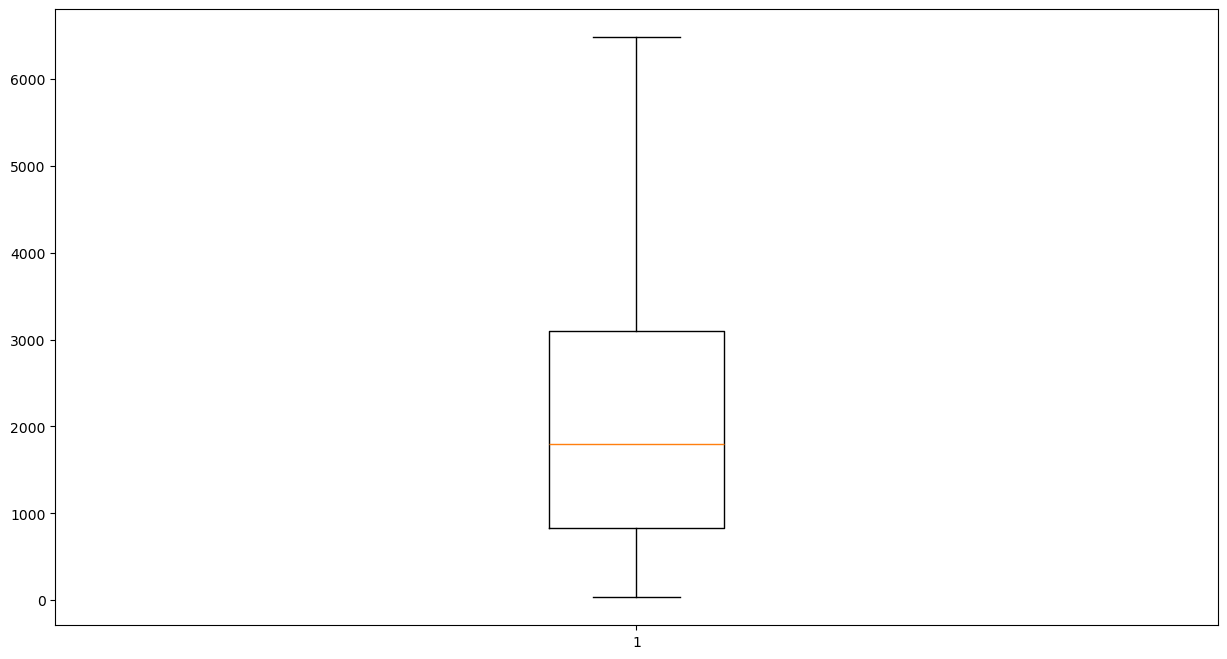

In [90]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(num_data.Item_Outlet_Sales)

plt.show()

## Feature Engineering

In [91]:
from datetime import date

current_year = date.today().year

sales['Outlet_Age'] = current_year - sales.Outlet_Establishment_Year

In [92]:
from sklearn.model_selection import train_test_split

Y = sales.Item_Outlet_Sales
X = sales.drop(['Item_Outlet_Sales'], axis=1)

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=100)

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("Y_train :", Y_train.shape)
print("Y_test :", Y_test.shape)

X_train : (6392, 18)
X_test : (2131, 18)
Y_train : (6392,)
Y_test : (2131,)
